<a href="https://colab.research.google.com/github/moh3azzam/Data-Analysis/blob/master/Loan_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loan Data Exploration


### by Mohamed Azzam


## Introduction





### Dataset

The dataset consisted of borrower APRs and attributes of 113,937 loans. The attributes included original loan amount, borrower's Prosper rating, loan term, borrower's stated monthly income, as well as many other features such as borrower's employment status, debt to income ratio, current loan status etc. The dataset can be found [here](https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv), with feature documentation available [here](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0)



| Variable              | Description                                                  |
| --------------------- | ------------------------------------------------------------ |
| Term                  | The length of the loan expressed in months.                  |
| LoanStatus            | The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket. |
| BorrowerAPR           | The Borrower's Annual Percentage Rate (APR) for the loan.    |
| ProsperRating (Alpha) | The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009. |
| EmploymentStatus      | The employment status of the borrower at the time they posted the listing. |
| StatedMonthlyIncome   | The monthly income the borrower stated at the time the listing was created. |
| LoanOriginalAmount    | The origination amount of the loan.                          |


## Load library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (15,5)
plt.rcParams['legend.title_fontsize'] = 'large'
base_color = sns.color_palette()[3]

In [3]:
font = {'family': 'serif',
        'color':  'Black',
        'weight': 'normal',
        'size': 20,
        }

## Import Data set

In [4]:
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/Data Sets/prosperLoanData.zip', 'r') as myzip:
    myzip.extractall()

In [5]:
dataset = pd.read_csv('/content/prosperLoanData.csv')

In [6]:
df = dataset[['Term', 'LoanStatus', 'BorrowerAPR', 'ProsperRating (Alpha)', 
              'EmploymentStatus', 'StatedMonthlyIncome', 'LoanOriginalAmount']]
df.head()

,Term,LoanStatus,BorrowerAPR,ProsperRating (Alpha),EmploymentStatus,StatedMonthlyIncome,LoanOriginalAmount
0,36,Completed,0.16516,NaN,Self-employed,3083.333333,9425
1,36,Current,0.12016,A,Employed,6125.000000,10000
2,36,Completed,0.28269,NaN,Not available,2083.333333,3001
3,36,Current,0.12528,A,Employed,2875.000000,10000
4,36,Current,0.24614,D,Employed,9583.333333,15000


## Data Wrangling

### What is the structure of data?

In [7]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')

The dataset has 113937 rows and 7 columns


### What is the features in Data set?


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Term                   113937 non-null  int64  
 1   LoanStatus             113937 non-null  object 
 2   BorrowerAPR            113912 non-null  float64
 3   ProsperRating (Alpha)  84853 non-null   object 
 4   EmploymentStatus       111682 non-null  object 
 5   StatedMonthlyIncome    113937 non-null  float64
 6   LoanOriginalAmount     113937 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 6.1+ MB


### Main Feature overview

| Variable              | Description                                                  |
| --------------------- | ------------------------------------------------------------ |
| Term                  | The length of the loan expressed in months.                  |
| LoanStatus            | The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket. |
| BorrowerAPR           | The Borrower's Annual Percentage Rate (APR) for the loan.    |
| ProsperRating (Alpha) | The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009. |
| EmploymentStatus      | The employment status of the borrower at the time they posted the listing. |
| StatedMonthlyIncome   | The monthly income the borrower stated at the time the listing was created. |
| LoanOriginalAmount    | The origination amount of the loan.                          |


In [ ]:
df.Term.unique()

array([36, 60, 12])

In [ ]:
df.LoanStatus.unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

In [ ]:
df.BorrowerAPR.unique()

array([0.16516, 0.12016, 0.28269, ..., 0.22674, 0.3477 , 0.19543])

In [ ]:
df['ProsperRating (Alpha)'].unique()

array([nan, 'A', 'D', 'B', 'E', 'C', 'AA', 'HR'], dtype=object)

In [ ]:
df['ProsperRating (Alpha)'].isna().sum()

29084

In [ ]:
df.EmploymentStatus.unique()

array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       nan, 'Not employed', 'Part-time', 'Retired'], dtype=object)

In [ ]:
df.EmploymentStatus.isna().sum()

2255

### Problems 
- `LoanStatus` $\to$ split the value of `Past Due` to another column describe how many day delay called `DueLate`
- Convert `DueLate` as Category
- `ProsperRating (Alpha)` $\to$ has $29084$ null value   
- `EmploymentStatus` $\to$ has $2255$ null value 

### Clean

---

Split the value of Past Due to another column describe how many day delay

---

In [ ]:
df.LoanStatus[df.LoanStatus.str.contains('Due')]

12          Past Due (1-15 days)
82         Past Due (16-30 days)
139         Past Due (1-15 days)
508        Past Due (61-90 days)
597        Past Due (61-90 days)
                   ...          
113697      Past Due (1-15 days)
113700      Past Due (1-15 days)
113748    Past Due (91-120 days)
113769     Past Due (31-60 days)
113875     Past Due (61-90 days)
Name: LoanStatus, Length: 2067, dtype: object

In [ ]:
def extractDue(x):
    if x.find(' Due ') != -1:
        return x[9:]
    return 0

df['DueLate'] = df.LoanStatus.apply(extractDue)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df.DueLate.unique()

array([0, '(1-15 days)', '(16-30 days)', '(61-90 days)', '(31-60 days)',
       '(91-120 days)', '(>120 days)'], dtype=object)

In [ ]:
df.LoanStatus.unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

In [ ]:
def LoanStatus(x):
    if x.find(' Due ') != -1:
        return 'Past Due'
    return x

df['LoanStatus_1'] = df.LoanStatus.apply(LoanStatus)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df.LoanStatus_1.unique()

array(['Completed', 'Current', 'Past Due', 'Defaulted', 'Chargedoff',
       'Cancelled', 'FinalPaymentInProgress'], dtype=object)

---

Convert `DueLate` as Category

---

In [ ]:
DueLevel = {'(1-15 days)':'Level 1', '(16-30 days)':'Level 2', '(61-90 days)':'Level 3', 
             '(31-60 days)':'Level 4', '(91-120 days)':'Level 5', '(>120 days)':'Level 6', '0':None} 
df['DueLevel'] = df.DueLate.map(DueLevel)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df.DueLevel.unique()

array([nan, 'Level 1', 'Level 2', 'Level 3', 'Level 4', 'Level 5',
       'Level 6'], dtype=object)

---

Remove null value in `ProsperRating (Alpha)` $29084$

---

In [ ]:
df.dropna(subset=['ProsperRating (Alpha)'], inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Term                   84853 non-null  int64  
 1   LoanStatus             84853 non-null  object 
 2   BorrowerAPR            84853 non-null  float64
 3   ProsperRating (Alpha)  84853 non-null  object 
 4   EmploymentStatus       84853 non-null  object 
 5   StatedMonthlyIncome    84853 non-null  float64
 6   LoanOriginalAmount     84853 non-null  int64  
 7   DueLate                84853 non-null  object 
 8   LoanStatus_1           84853 non-null  object 
 9   DueLevel               2067 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 7.1+ MB


In [ ]:
df.to_csv('prosperLoanData_1.csv')

In [ ]:
! mv  "prosperLoanData_1.csv" "/content/drive/MyDrive/Colab Notebooks/Data Sets"

## Data Exploration

In [8]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Sets/prosperLoanData_1.csv',
                index_col=0)
df.head()

,Term,LoanStatus,BorrowerAPR,ProsperRating (Alpha),EmploymentStatus,StatedMonthlyIncome,LoanOriginalAmount,DueLate,LoanStatus_1,DueLevel
1,36,Current,0.12016,A,Employed,6125.000000,10000,0,Current,NaN
3,36,Current,0.12528,A,Employed,2875.000000,10000,0,Current,NaN
4,36,Current,0.24614,D,Employed,9583.333333,15000,0,Current,NaN
5,60,Current,0.15425,B,Employed,8333.333333,15000,0,Current,NaN
6,36,Current,0.31032,E,Employed,2083.333333,3000,0,Current,NaN


In [ ]:
df.describe()

,Term,BorrowerAPR,StatedMonthlyIncome,LoanOriginalAmount
count,84853.000000,84853.000000,8.485300e+04,84853.000000
mean,42.486135,0.226658,5.931175e+03,9083.440515
std,11.640346,0.079916,8.239944e+03,6287.860058
min,12.000000,0.045830,0.000000e+00,1000.000000
25%,36.000000,0.163280,3.434000e+03,4000.000000
50%,36.000000,0.219450,5.000000e+03,7500.000000
75%,60.000000,0.292540,7.083333e+03,13500.000000
max,60.000000,0.423950,1.750003e+06,35000.000000


### Univariate Exploration

####**What is the most term?**

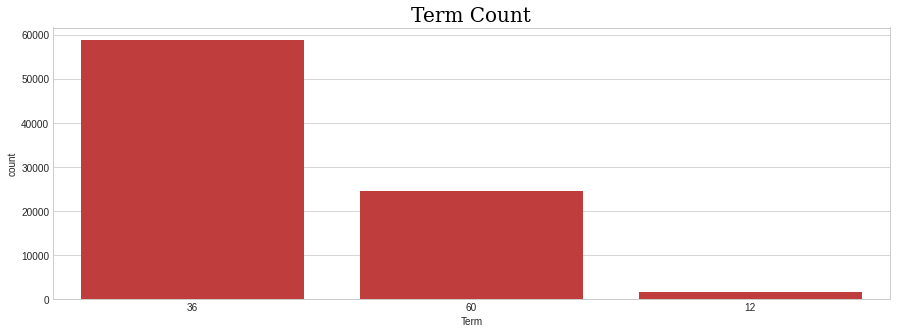

In [ ]:
cat_order = df['Term'].value_counts().index
sns.countplot(data = df, x = 'Term', color=base_color, order=cat_order)
plt.title('Term Count', fontdict=font);

- We can find that the most `Term` is $36$ months it is equal to $3$ years


---

####**What is the most Loan status**

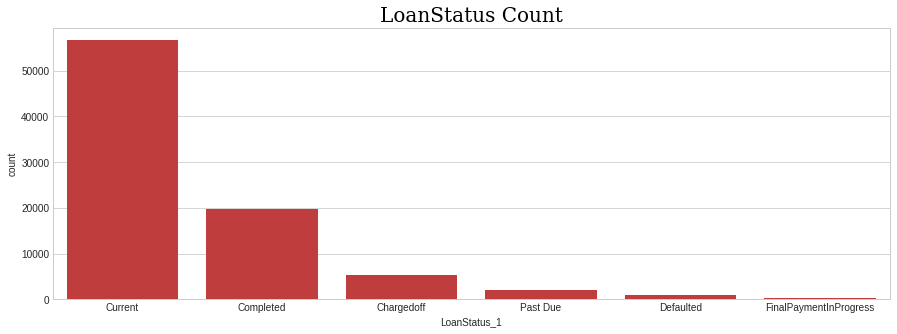

In [ ]:
cat_order = df['LoanStatus_1'].value_counts().index
sns.countplot(data = df, x = 'LoanStatus_1', color=base_color, order=cat_order)
plt.title('LoanStatus Count', fontdict=font);

- The most `Loan Status` is Current

---

####**What is the distribution of BorrowerAPR**

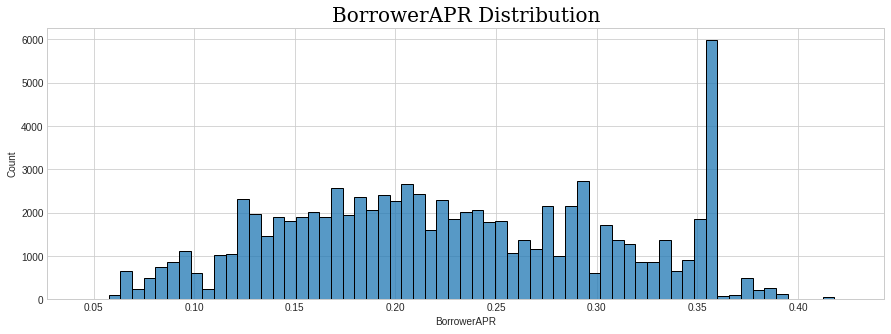

In [ ]:
sns.histplot(df['BorrowerAPR']);
plt.title('BorrowerAPR Distribution', fontdict=font);

- The most Loan ratio is located  between $0.15 \to 0.25$
- We can see that the distribution is multimodel



---

####What is the most ProsperRating?

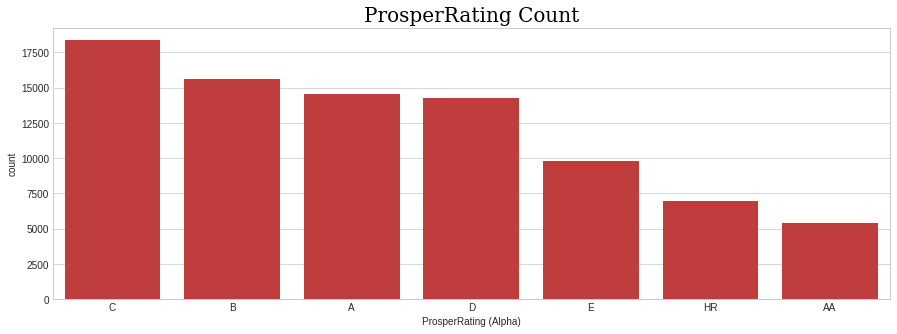

In [ ]:
cat_order = df['ProsperRating (Alpha)'].value_counts().index
sns.countplot(data = df, x = 'ProsperRating (Alpha)', color=base_color, order=cat_order)
plt.title('ProsperRating Count', fontdict=font);

- The most prosper Rating is `C`
- From `C` we can see that  Estimated Avg. Annual Loss Rate is $6.00 \to 8.99\%$



---

####What is the most EmploymentStatus?

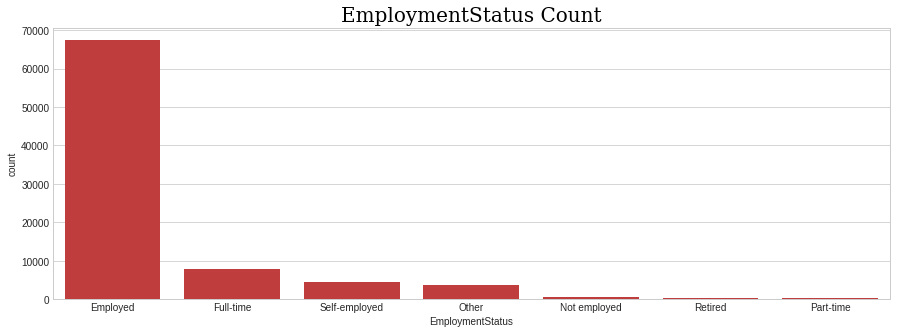

In [ ]:
cat_order = df['EmploymentStatus'].value_counts().index
sns.countplot(data = df, x = 'EmploymentStatus', color=base_color, order=cat_order)
plt.title('EmploymentStatus Count', fontdict=font);

- Wc can see that `EmploymentStatus` is Employes

--- 

####What is the distribution of StatedMonthlyIncome? 

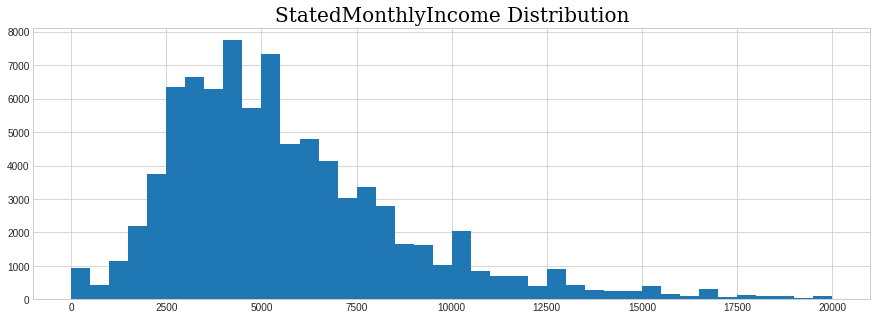

In [ ]:
bin_edges = np.arange(0,20000+500, 500)

# sns.histplot(df['StatedMonthlyIncome'], bins=bin_edges);
plt.hist(data = df, x = 'StatedMonthlyIncome', bins=bin_edges);

plt.title('StatedMonthlyIncome Distribution', fontdict=font);

- `StatedMonthlyIncome` is right skewed and most salary located between $2500 \to 7500$

--- 

#### What is the distribution of LoanOriginalAmount? 

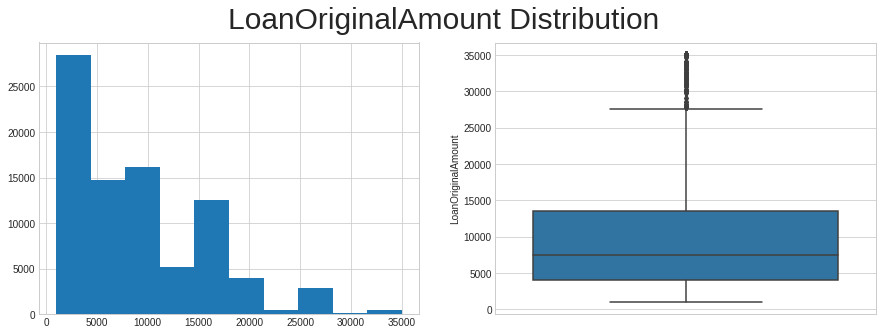

In [ ]:
plt.subplot(1,2,1)
plt.hist(data = df, x = 'LoanOriginalAmount');
# plt.title

plt.subplot(1,2,2)
sns.boxplot(y=df['LoanOriginalAmount'])

plt.suptitle('LoanOriginalAmount Distribution', fontsize=30);

- we can find that most loans between $1000 \to 13000$

--- 

#### What is the most Due Level? 

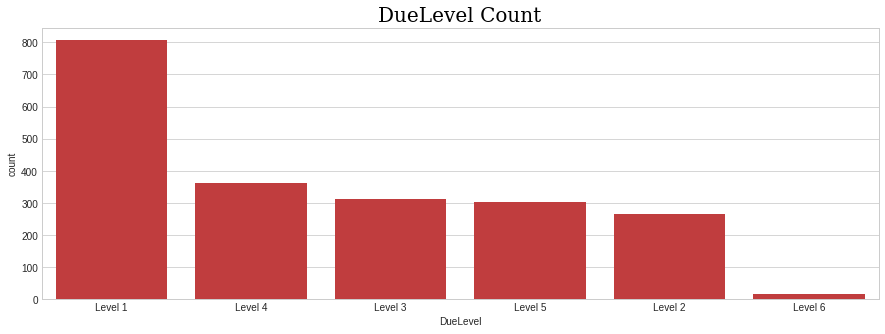

In [ ]:
cat_order = df['DueLevel'].value_counts().index
sns.countplot(data = df, x = 'DueLevel', color=base_color, order=cat_order)
plt.title('DueLevel Count', fontdict=font);

- Due Level Clarification
    - Level 1 --> 1-15 days
    - Level 2 --> 16-30 days
    - Level 3 --> 61-90 days 
    - Level 4 --> 31-60 days
    - Level 5 --> 91-120 days
    - Level 6 --> (>120 days)

-  we can see that most of people who Past Due not exceed 4 Months

### Bivariate Exploration

In [ ]:
df.head(2)

,Term,LoanStatus,BorrowerAPR,ProsperRating (Alpha),EmploymentStatus,StatedMonthlyIncome,LoanOriginalAmount,DueLate,DueLevel,LoanStatus_1
1,36,Current,0.12016,A,Employed,6125.0,10000,0,NaN,Current
3,36,Current,0.12528,A,Employed,2875.0,10000,0,NaN,Current


#### What is the features that have corelation more then 0.1?

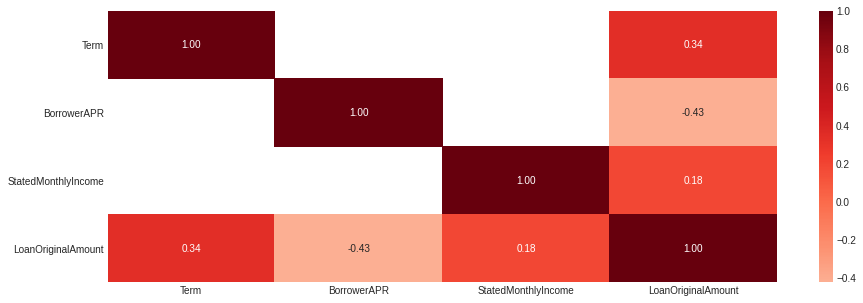

In [16]:
corr = df.corr()

kot = corr[corr.apply(lambda x: abs(x)>=.1)]

sns.heatmap(kot, annot = True, fmt = '.2f', cmap = 'Reds', center = 0);

- we can find that there are corelation 

    1. Positive relation between Term and Loan Original Amount
    2. Negative relation Between BorrowerAPR and Loan Original Amount
    3. small positive correlation between monthly income and loan amount


---

#### What is the relation between `Term` and `Loan Status`?

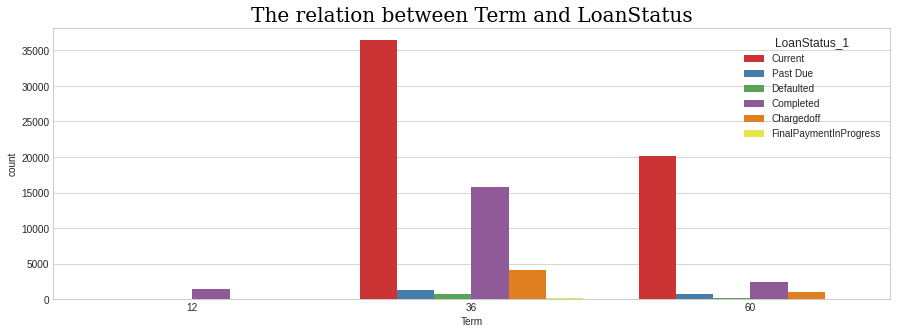

In [ ]:
sns.countplot(data = df, x = 'Term', hue = 'LoanStatus_1', palette='Set1')
plt.title('The relation between Term and LoanStatus', fontdict=font);

- We can find that there is no relation between `Term` and `loan status` specially when loan status is Past Due


####What is the relation between `Term` and `BorrowerAPR`?

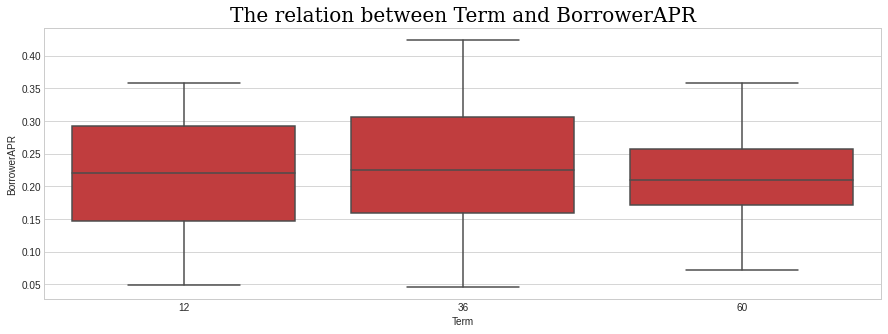

In [ ]:
sns.boxplot(data = df, x = 'Term', y = 'BorrowerAPR', color = base_color)
plt.title('The relation between Term and BorrowerAPR', fontdict=font);

- we can conduct that Borrow ratio decrease when term increase

---

#### What is the relation between `Term` and `Monthly Income`?

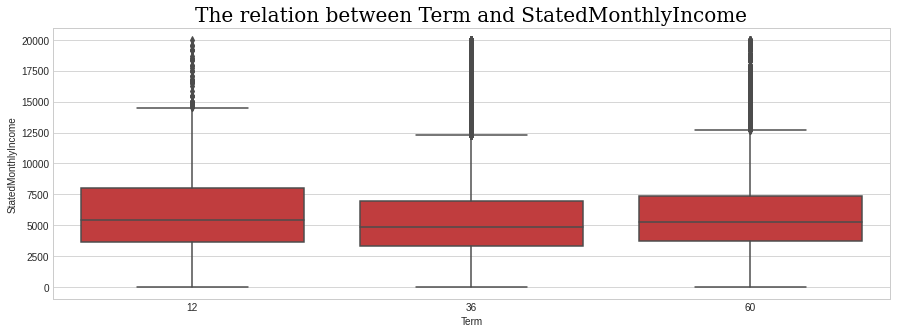

In [12]:
df_filter = df.query('StatedMonthlyIncome <= 20000')
sns.boxplot(data = df_filter, x = 'Term', y = 'StatedMonthlyIncome', color = base_color)
plt.title('The relation between Term and StatedMonthlyIncome', fontdict=font);

- We can conclude that if the people has a good salary in month it will take term that has 12 month 

---

#### What is the relation between Term and Loan Amount?

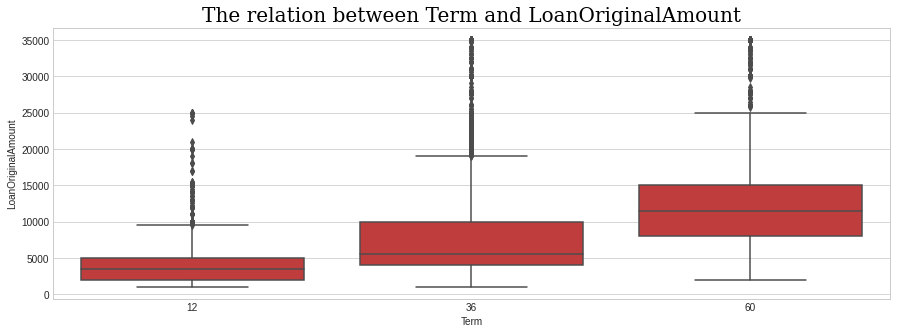

In [13]:
sns.boxplot(data = df_filter, x = 'Term', y = 'LoanOriginalAmount', color = base_color)
plt.title('The relation between Term and LoanOriginalAmount', fontdict=font);

- we can conduct that there is relation between `Term` and `LoanOriginalAmount` when `LoanOriginalAmount` increase the `Term` is Increase



#### What is the relation between `EmploymentStatus` and `LoanOriginalAmount`?

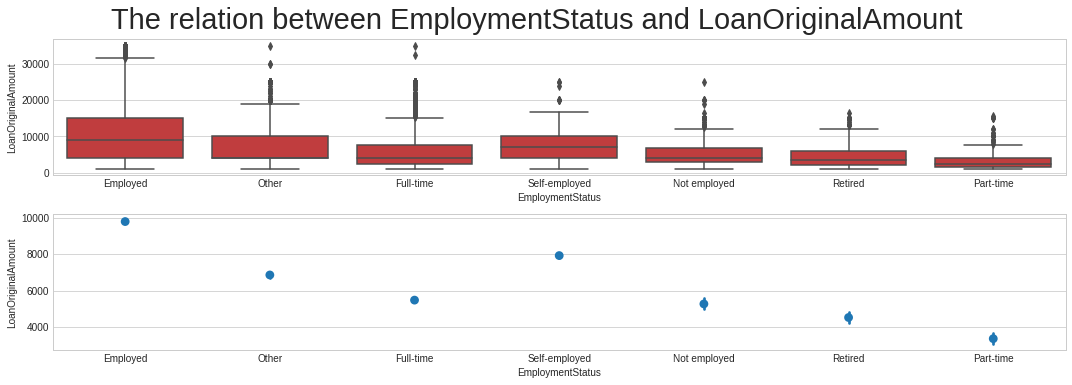

In [ ]:
plt.subplot(211)
sns.boxplot(data = df, x = 'EmploymentStatus', y = 'LoanOriginalAmount', color = base_color)

plt.subplot(212)
sns.pointplot(data = df, x = 'EmploymentStatus', y = 'LoanOriginalAmount', linestyles = "")

plt.suptitle('The relation between EmploymentStatus and LoanOriginalAmount', fontsize=29, y=1.06);
plt.tight_layout()

- we can conduct that if the person is Employed or Self Employed the loan is Increase

--- 

#### What is the relation between `Term` and `EmploymentStatus`?

Text(0.5, 1.0, 'The relation between Term and EmploymentStatus')

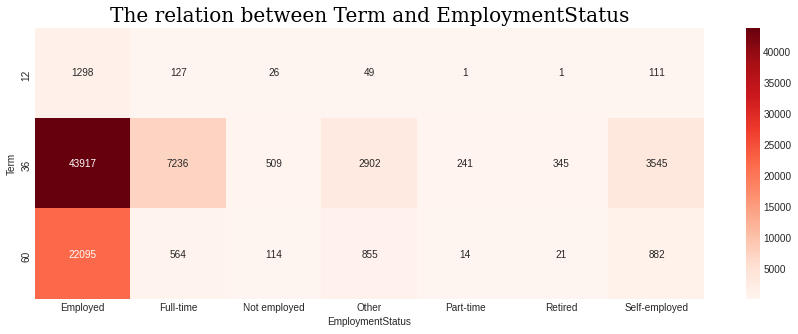

In [ ]:
ct_counts = df.groupby(['Term', 'EmploymentStatus']).size()
ct_counts = ct_counts.reset_index(name = 'count') # Reset the index of the DataFrame, and use the default one instead. If the DataFrame has a MultiIndex, this method can remove one or more levels.
ct_counts = ct_counts.pivot(index = 'Term', columns = 'EmploymentStatus', values = 'count')
sns.heatmap(ct_counts, annot = True, fmt = 'd', cmap='Reds');
plt.title('The relation between Term and EmploymentStatus', fontdict=font);

- we can conduct that most of Employed person taken the loan with in 36 - 60 months

#### The relation between BorrowerAPR and LoanOriginalAmount

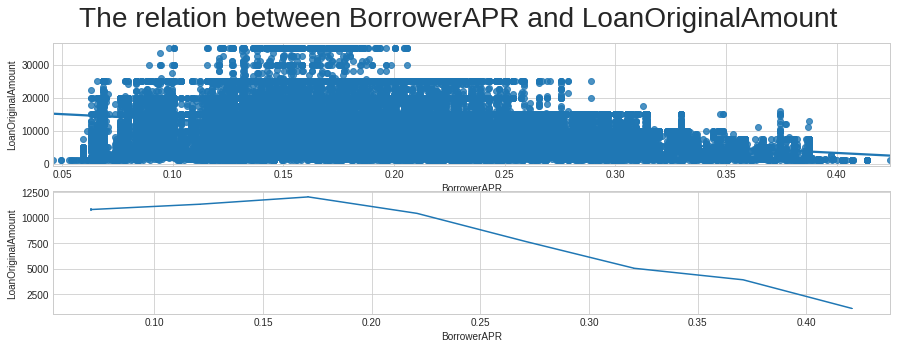

In [ ]:
plt.subplot(211)
sns.regplot(data = df, x = 'BorrowerAPR', y = 'LoanOriginalAmount')

plt.subplot(212)
# set bin edges, compute centers
bin_size = 0.05
xbin_edges = np.arange( df['BorrowerAPR'].min(), df['BorrowerAPR'].max()+bin_size, bin_size)
xbin_centers = (xbin_edges + bin_size/2)[:-1]

# compute statistics in each bin
data_xbins = pd.cut(df['BorrowerAPR'], xbin_edges, right = False, include_lowest = True)
y_means = df['LoanOriginalAmount'].groupby(data_xbins).mean()
y_sems = df['LoanOriginalAmount'].groupby(data_xbins).sem()

# plot the summarized data
plt.errorbar(x = xbin_centers, y = y_means, yerr = y_sems)
plt.xlabel('BorrowerAPR')
plt.ylabel('LoanOriginalAmount')

plt.suptitle('The relation between BorrowerAPR and LoanOriginalAmount', fontsize=28);
# plt.tight_layout()

- we can conduct that there is negative relation between `BorrowerAPR` and `Loan Amount` when the loan amount decrease the borrowerAPR increase



#### The relation between BorrowerAPR and Prosper Rating

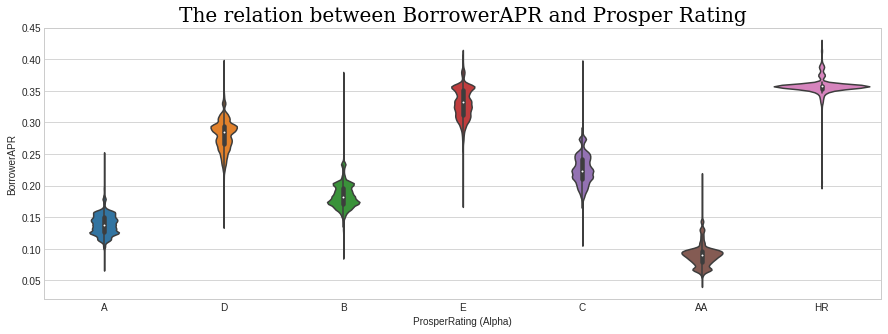

In [ ]:
df_filter = df.sort_values(by=['ProsperRating (Alpha)'])
sns.violinplot(data=df, x='ProsperRating (Alpha)', y='BorrowerAPR')
plt.title('The relation between BorrowerAPR and Prosper Rating', fontdict=font);

- Investgate the better Prosper Rating the less BorrowerAPR 

#### The relation between Monthly income and Loan Amount

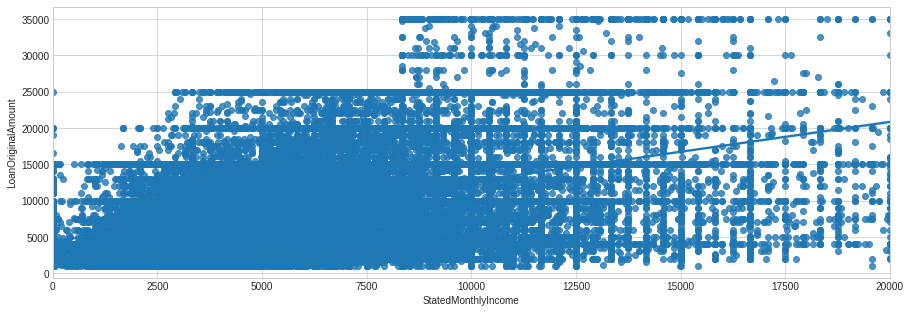

In [15]:
sns.regplot(data = df_filter, x = 'StatedMonthlyIncome', y = 'LoanOriginalAmount')

### Multivariate Exploration


In [ ]:
df.head()

,Term,LoanStatus,BorrowerAPR,ProsperRating (Alpha),EmploymentStatus,StatedMonthlyIncome,LoanOriginalAmount,DueLate,LoanStatus_1,DueLevel
1,36,Current,0.12016,A,Employed,6125.000000,10000,0,Current,NaN
3,36,Current,0.12528,A,Employed,2875.000000,10000,0,Current,NaN
4,36,Current,0.24614,D,Employed,9583.333333,15000,0,Current,NaN
5,60,Current,0.15425,B,Employed,8333.333333,15000,0,Current,NaN
6,36,Current,0.31032,E,Employed,2083.333333,3000,0,Current,NaN


#### ProsperRating and relation between Borrower and Loan amount




/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


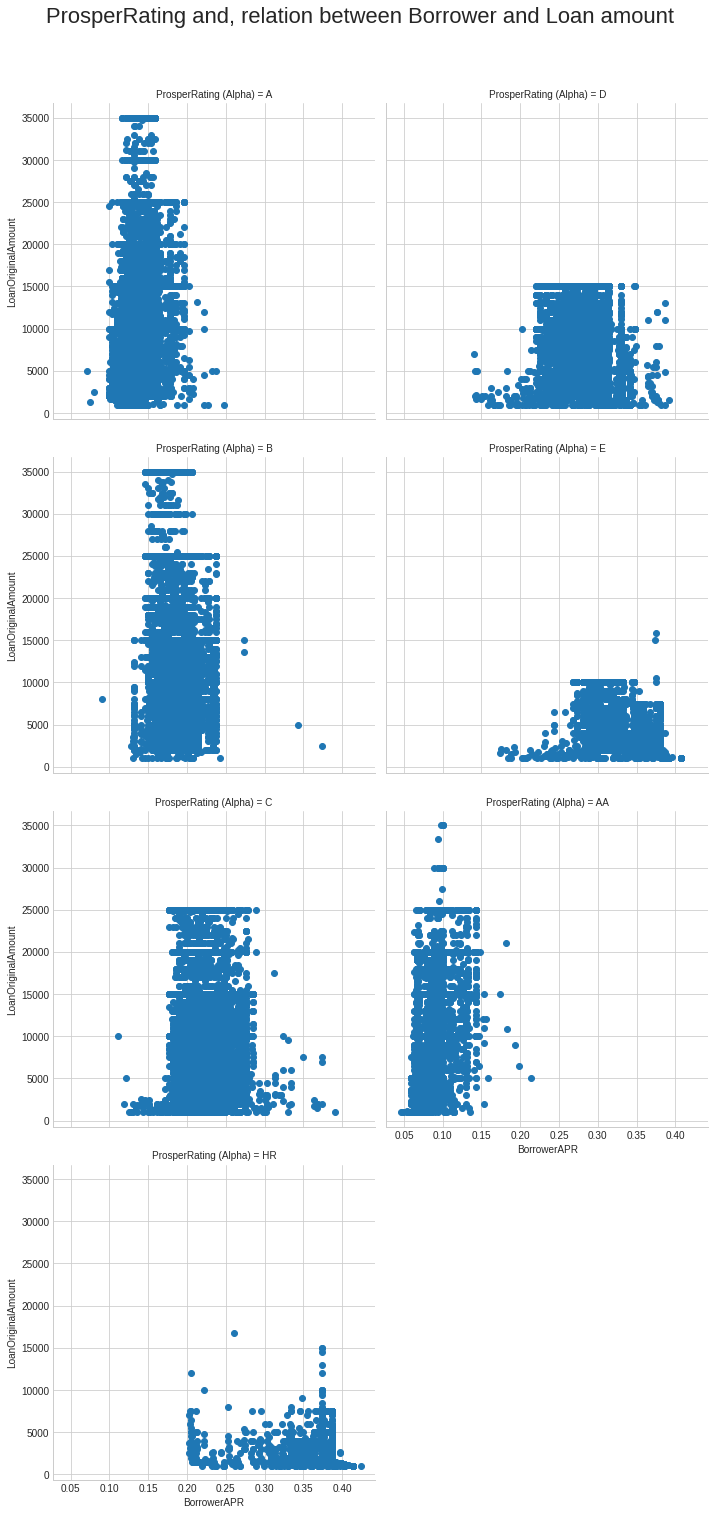

In [ ]:
g = sns.FacetGrid(data = df, col = 'ProsperRating (Alpha)', size = 5, col_wrap=2)
g.map(plt.scatter, 'BorrowerAPR', 'LoanOriginalAmount')
g.add_legend();
# g.fig.subplots_adjust(top=.9)
plt.suptitle('ProsperRating and relation between Borrower and Loan amount', font size=22, y=1.05);

- we can conduct that there are relation between BorrowerAPR and Loan Amount and Prosper Rating when Prosper rating is less then B the BorrowerAPR increase and the loan amount decrease 

Text(0, 0.5, 'LoanOriginalAmount')

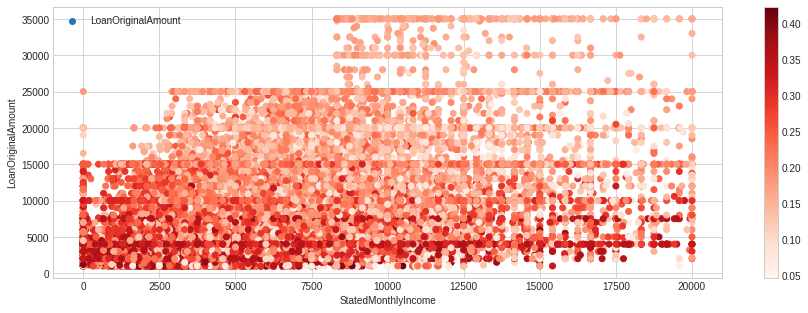

In [ ]:
df_filter = df.query('StatedMonthlyIncome <= 20000')
plt.scatter(data = df_filter, c = 'BorrowerAPR', y = 'LoanOriginalAmount', 
            x = 'StatedMonthlyIncome', cmap='Reds')
plt.colorbar()
plt.legend()
plt.xlabel('StatedMonthlyIncome')
plt.ylabel('LoanOriginalAmount')

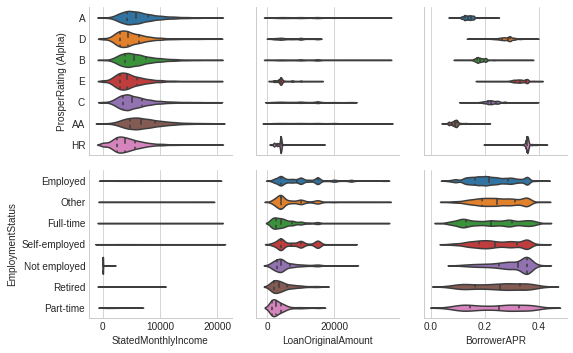

In [ ]:

g = sns.PairGrid(data = df_filter, x_vars = ['StatedMonthlyIncome', 'LoanOriginalAmount', 'BorrowerAPR'],
                y_vars = ['ProsperRating (Alpha)', 'EmploymentStatus'])
g.map(sns.violinplot, inner = 'quartile');

#### Borrower APR by Rating and Term

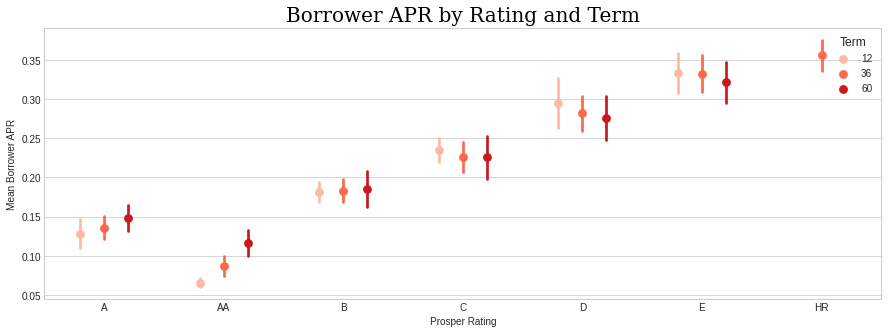

In [ ]:
df_filter = df.sort_values(by =['ProsperRating (Alpha)'])
ax = sns.pointplot(data = df_filter, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Reds', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower APR across rating and term')
plt.ylabel('Mean Borrower APR')
plt.xlabel('Prosper Rating')
plt.title('Borrower APR by Rating and Term', fontdict=font);

- Interestingly, the borrower decrease with the increase of term for people with HR-C raings. But for people with B-AA ratings, the APR increase with the increase of borrow term.

- Interestingly the Borrower from AA-B is lower then C-HR



## Summary of Findings


In this exploration we found the following 
- The borrower APR is negatively correlated with original loan amount. 
- At different size of the loan amount, the APR has a large range, but the range of APR decrease with the increase of loan amount
- The borrower APR also decreases with the increasingly better rating. Borrowers with the best Prosper ratings have the lowest APR. It means that the Prosper rating has a strong effect on borrower APR.
- The relation between BorrowerAPR and Loan Amount and Prosper Rating when Prosper rating is less then B the BorrowerAPR increase and the loan amount decrease 
- the loan amount is positively correlated with the stated monthly income, it makes sense since borrowers with more monthly income could loan more money. 
- The loan amount is also increased with the increase of loan term.
- borrowers with better ratings have larger monthly income and loan amount. Employed, self-employed and full time borrowers have more monthly income and loan amount than part-time, retired and not employed borrowers.
- The most of people who Past Due is between 1-15 days

### Key Insights for Presentation





For the presentation, I just focus on features that could affect the borrower APR , which are original loan amount, Prosper rating. 

I started by showing the distribution of borrower APR and loan amount variable. 

Then, I showed the relationship between APR vs. loan amount, as well as APR vs. rating. I also investigated the effect of rating on ralationship between APR and loan amount, as well as the effect of rating on relationship between borrower APR and term.